<a href="https://colab.research.google.com/github/hgstyler/SEM-Denoise-Project/blob/main/OpenCV_Denoise_Filter_08242022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Module Load**###

In [ ]:
import os
import sys
import cv2
from google.colab.patches import cv2_imshow
import skimage
import numpy as np
from matplotlib import pyplot as plt

# google drive mount
from google.colab import drive
drive.mount('/content/drive')

# module version check
print(f'OpenCV version: {cv2.__version__}')
print(f'SK Image version: {skimage.__version__}')
print(f'Numpy version: {np.__version__}')

Mounted at /content/drive
OpenCV version: 4.6.0
SK Image version: 0.18.3
Numpy version: 1.21.6


###**Image Variables Assignment**###

**Information**  

| Variable Name | Spot Size | Dwelling Time | Voltage | Magnification |
|:--------:|:--------:|:------:|:--------:|:--------:|
| clean | 30 | 30us | 30kV | x30k |
| noised_001 | 30 | 50ns | 30kV | x30k |
| noised_002 | 30 | 100ns | 30kV | x30k |
| noised_003 | 30 | 500ns | 30kV | x30k |
| noised_004 | 30 | 1us | 30kV | x30k |
| noised_005 | 30 | 3us | 30kV | x30k |


In [ ]:
# Image variable assignment
# Before excution, google drive mount should be connected.

tinball_clean = cv2.imread('/content/drive/MyDrive/ML/0823/Dwell_30us.tif')

tinball_noised_001 = cv2.imread('/content/drive/MyDrive/ML/0823/Dwell_50ns.tif')
tinball_noised_002 = cv2.imread('/content/drive/MyDrive/ML/0823/Dwell_100ns.tif')
tinball_noised_003 = cv2.imread('/content/drive/MyDrive/ML/0823/Dwell_500ns.tif')
tinball_noised_004 = cv2.imread('/content/drive/MyDrive/ML/0823/Dwell_1us.tif')
tinball_noised_005 = cv2.imread('/content/drive/MyDrive/ML/0823/Dwell_3us.tif')

**Show Image**  

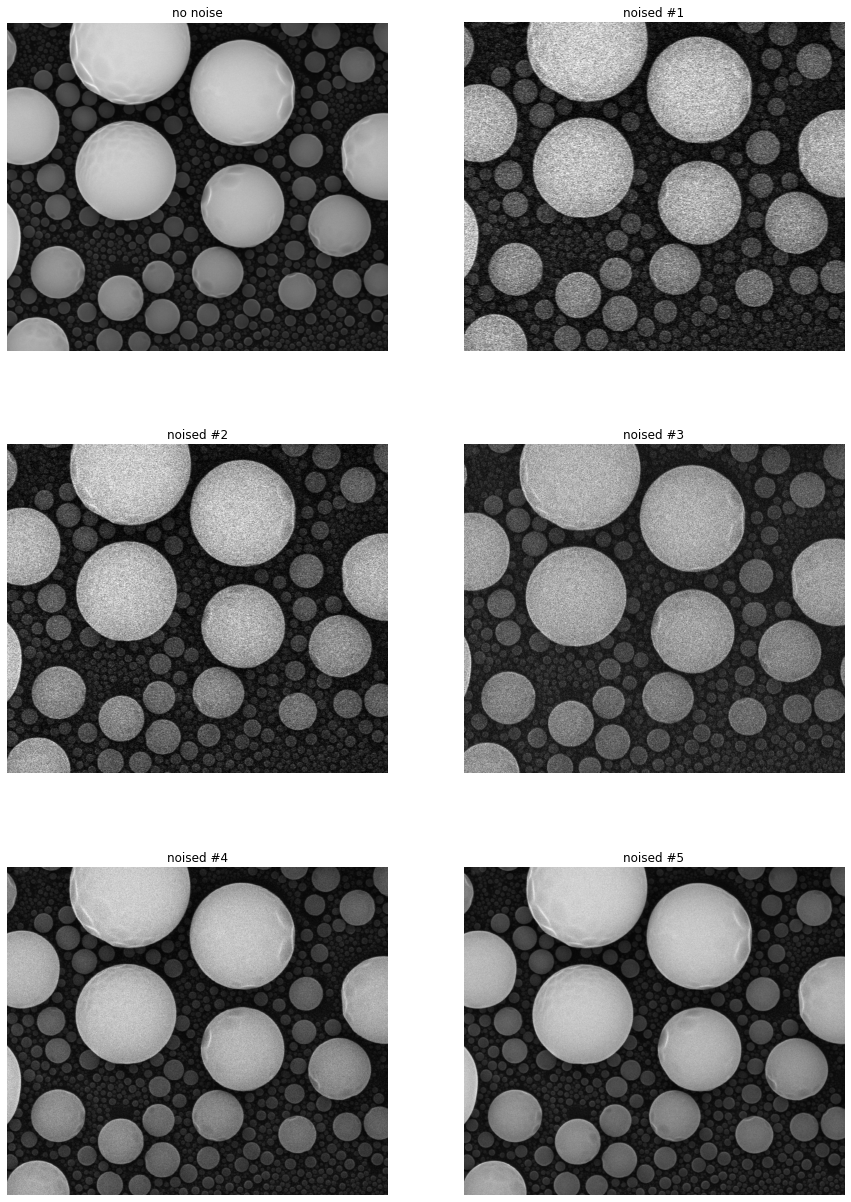

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# list variables for image and subplot title
raw_image = [tinball_clean, tinball_noised_001, tinball_noised_002, tinball_noised_003, tinball_noised_004, tinball_noised_005]
raw_image_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(raw_image[i])
    plt.title(raw_image_title[i])
    plt.axis("off")

###**Noise Generation, Noise reduction filter codes**###  

```Python
import cv2
import skimage

img = skimage.util.random_noise(src012, mode="gaussian")
# mode = "gaussian" / "localvar" / "poisson" / "salt" / "pepper" / "s&p" / "speckle"  

img = cv2.bilateralFilter(src012, -1, sigmaColorDev, sigmaSpaceDev)
# sigmaColorDev & sigmaSpaceDev in range from 0 to 100
# "-1" means that a neighboring pixel distance is automatically determined by sigmaSpaceDev value.  
# bilateral filter can implement only uint8 and float32.  

img = cv2.GaussianBlur(src012, (0, 0), sigma)
# (0,0) means a kernel size of gaussian distribution is automatically determined by sigma.
```

###**Bilater Filter used #1**###  

True

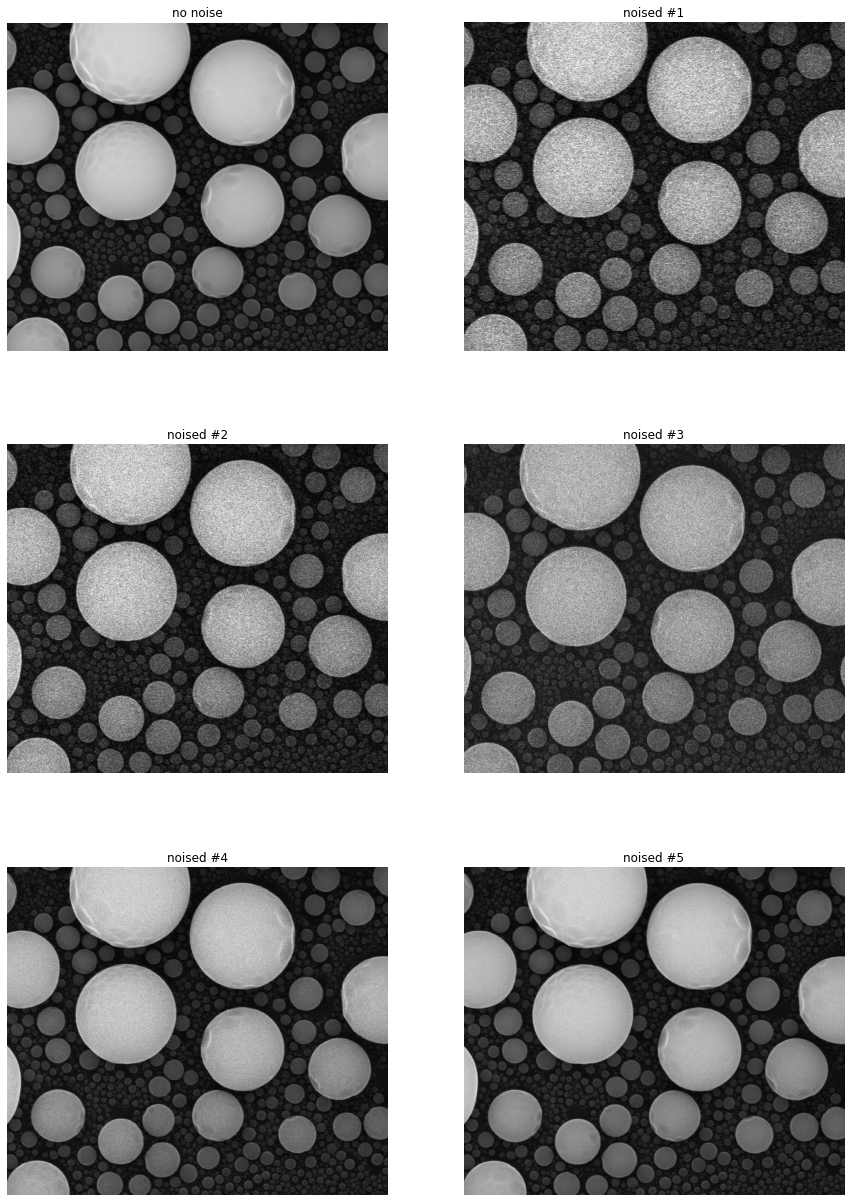

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# bilateralFilter(src, filter size, sigma color, sigma space)
case1_001 = cv2.bilateralFilter(tinball_noised_001, -1, 10, 10)
case1_002 = cv2.bilateralFilter(tinball_noised_002, -1, 10, 10)
case1_003 = cv2.bilateralFilter(tinball_noised_003, -1, 10, 10)
case1_004 = cv2.bilateralFilter(tinball_noised_004, -1, 10, 10)
case1_005 = cv2.bilateralFilter(tinball_noised_005, -1, 10, 10)

# list variables for image and subplot title
case1_src = [tinball_clean, case1_001, case1_002, case1_003, case1_004, case1_005]
case1_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(case1_src[i])
    plt.title(case1_title[i])
    plt.axis("off")

# save files
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_50ns_011.tif',  case1_001)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_100ns_011.tif', case1_002)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_500ns_011.tif', case1_003)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_1us_011.tif',   case1_004)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_3us_011.tif',   case1_005)

###**Bilateral Filter used #2**###

True

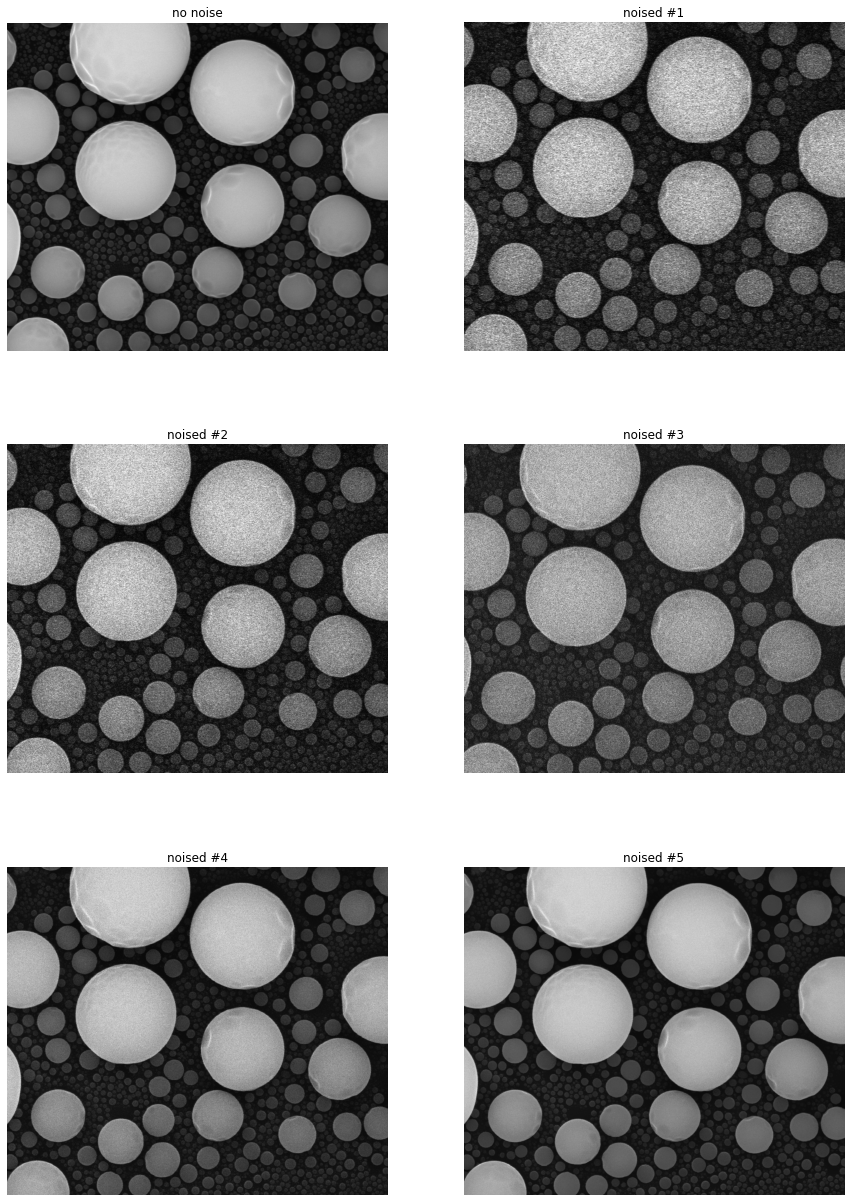

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# bilateral filter
case2_001 = cv2.bilateralFilter(case1_001, -1, 20, 20)
case2_002 = cv2.bilateralFilter(case1_002, -1, 20, 20)
case2_003 = cv2.bilateralFilter(case1_003, -1, 20, 20)
case2_004 = cv2.bilateralFilter(case1_004, -1, 20, 20)
case2_005 = cv2.bilateralFilter(case1_005, -1, 20, 20)

# list variables for image and subplot title
case2_src = [tinball_clean, case2_001, case2_002, case2_003, case2_004, case2_005]
case2_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(case2_src[i])
    plt.title(case2_title[i])
    plt.axis("off")

# save files
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_50ns_012.tif',  case2_001)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_100ns_012.tif', case2_002)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_500ns_012.tif', case2_003)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_1us_012.tif',   case2_004)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_3us_012.tif',   case2_005)

###**Bilateral Filter used #3**###

True

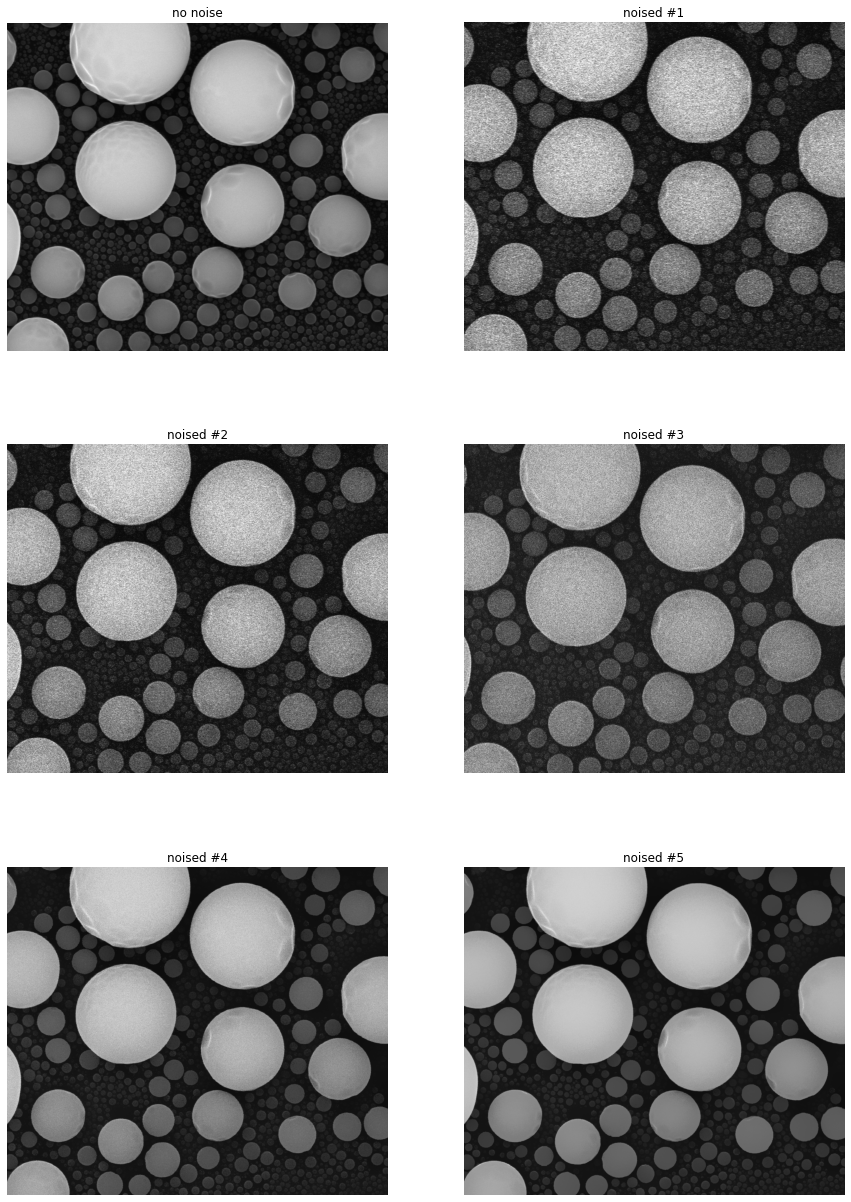

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# bilateral filter
case3_001 = cv2.bilateralFilter(case2_001, -1, 30, 30)
case3_002 = cv2.bilateralFilter(case2_002, -1, 30, 30)
case3_003 = cv2.bilateralFilter(case2_003, -1, 30, 30)
case3_004 = cv2.bilateralFilter(case2_004, -1, 30, 30)
case3_005 = cv2.bilateralFilter(case2_005, -1, 30, 30)

# list variables for image and subplot title
case3_src = [tinball_clean, case3_001, case3_002, case3_003, case3_004, case3_005]
case3_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(case3_src[i])
    plt.title(case3_title[i])
    plt.axis("off")

# save files
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_50ns_013.tif',  case3_001)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_100ns_013.tif', case3_002)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_500ns_013.tif', case3_003)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_1us_013.tif',   case3_004)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_3us_013.tif',   case3_005)

###**Bilater Filter used #4**###

True

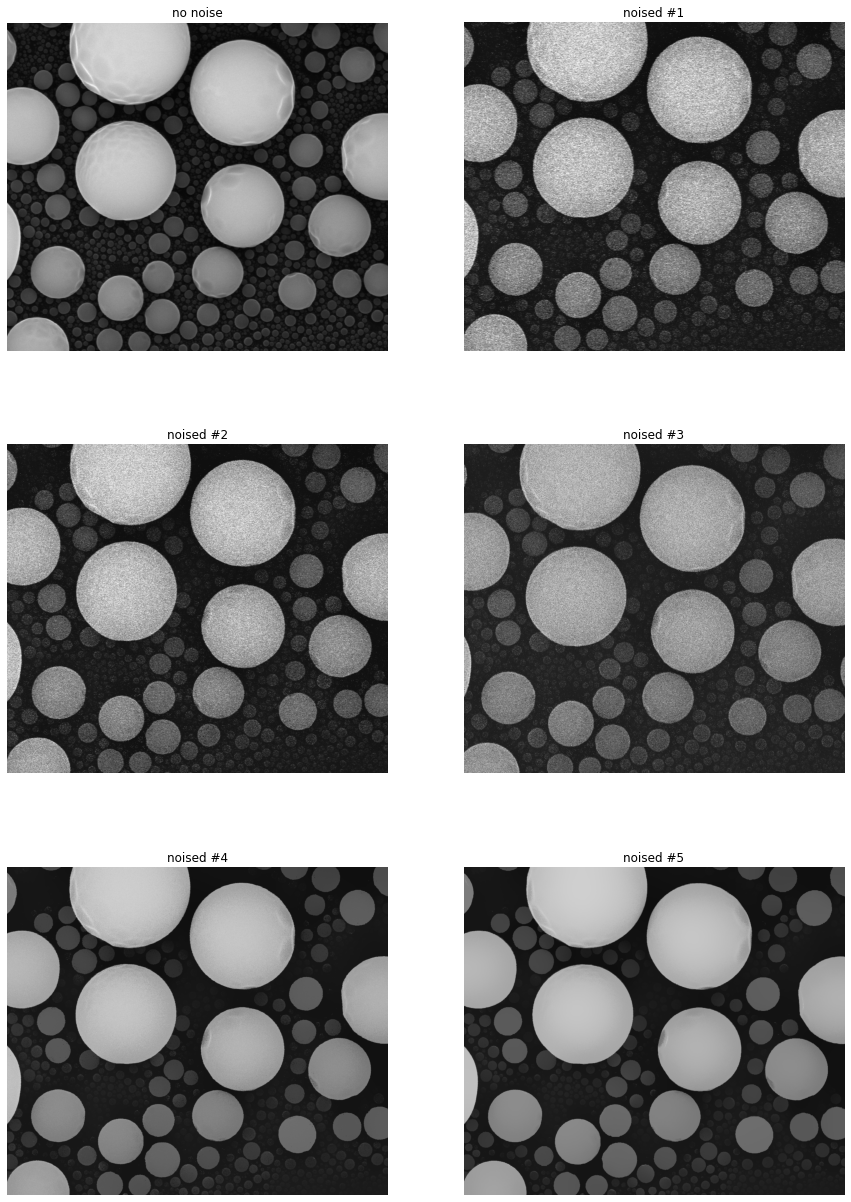

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# bilateral filter
case4_001 = cv2.bilateralFilter(case3_001, -1, 40, 40)
case4_002 = cv2.bilateralFilter(case3_002, -1, 40, 40)
case4_003 = cv2.bilateralFilter(case3_003, -1, 40, 40)
case4_004 = cv2.bilateralFilter(case3_004, -1, 40, 40)
case4_005 = cv2.bilateralFilter(case3_005, -1, 40, 40)

# list variables for image and subplot title
case4_src = [tinball_clean, case4_001, case4_002, case4_003, case4_004, case4_005]
case4_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(case4_src[i])
    plt.title(case4_title[i])
    plt.axis("off")

# save files
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_50ns_014.tif',  case4_001)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_100ns_014.tif', case4_002)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_500ns_014.tif', case4_003)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_1us_014.tif',   case4_004)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_3us_014.tif',   case4_005)

###**Bilater Filter used #5**###

True

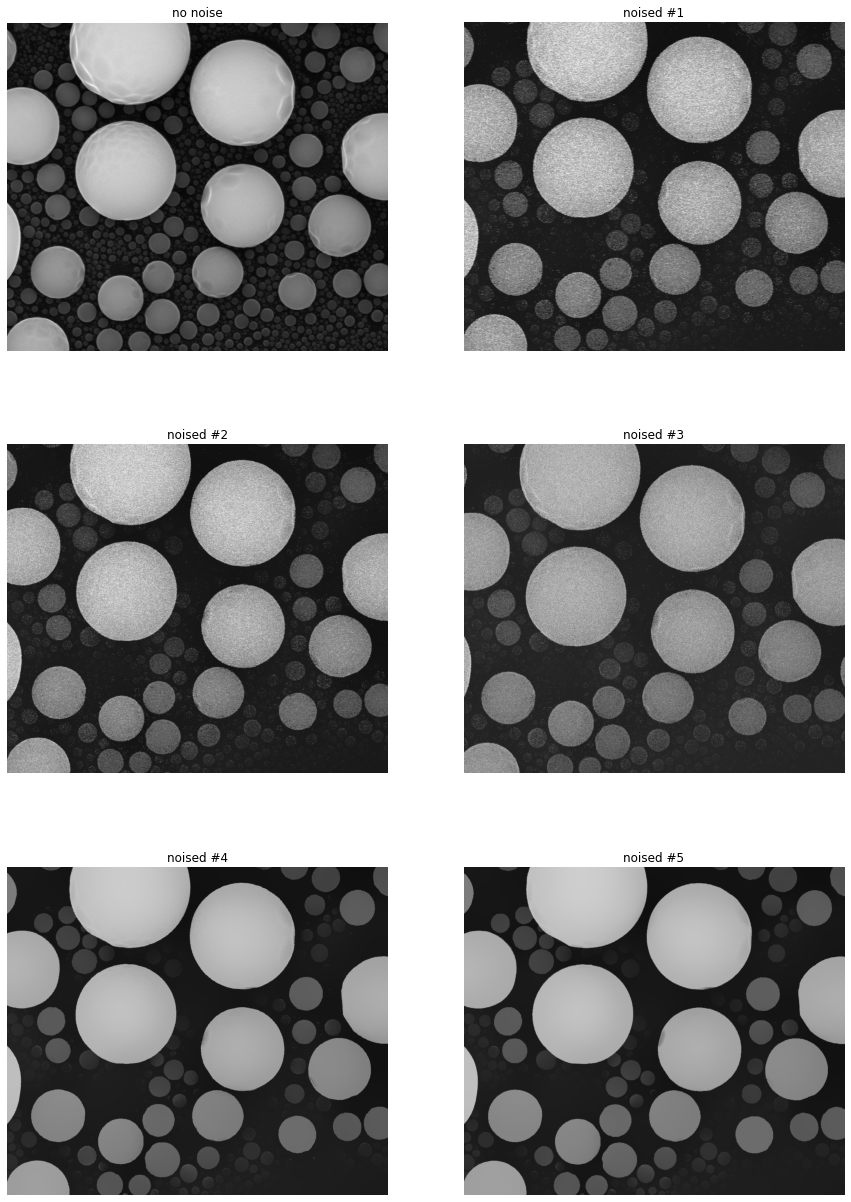

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# bilateral filter
case5_001 = cv2.bilateralFilter(case4_001, -1, 50, 50)
case5_002 = cv2.bilateralFilter(case4_002, -1, 50, 50)
case5_003 = cv2.bilateralFilter(case4_003, -1, 50, 50)
case5_004 = cv2.bilateralFilter(case4_004, -1, 50, 50)
case5_005 = cv2.bilateralFilter(case4_005, -1, 50, 50)

# list variables for image and subplot title
case5_src = [tinball_clean, case5_001, case5_002, case5_003, case5_004, case5_005]
case5_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(case5_src[i])
    plt.title(case5_title[i])
    plt.axis("off")

# save files
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_50ns_015.tif',  case5_001)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_100ns_015.tif', case5_002)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_500ns_015.tif', case5_003)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_1us_015.tif',   case5_004)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_3us_015.tif',   case5_005)

###**Bilateral Filter used #6**###

True

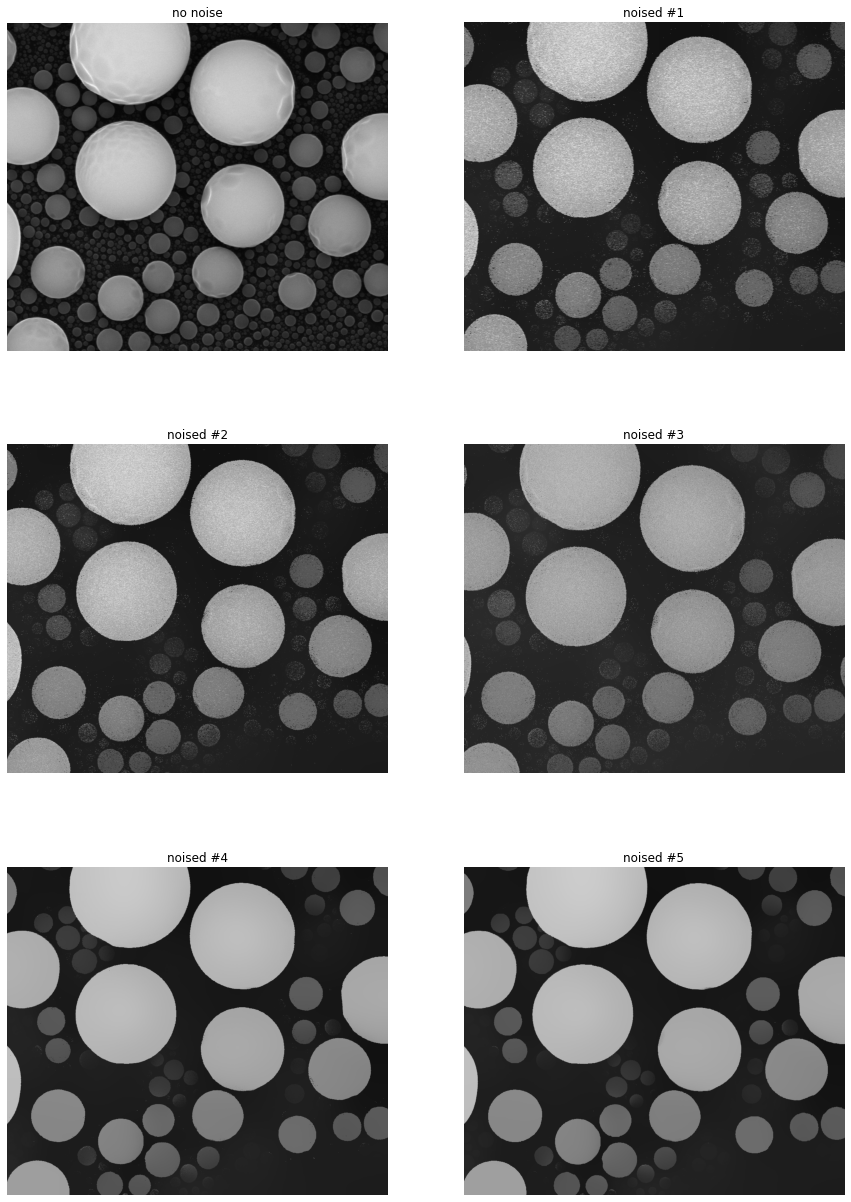

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# bilateral filter
case6_001 = cv2.bilateralFilter(case5_001, -1, 60, 60)
case6_002 = cv2.bilateralFilter(case5_002, -1, 60, 60)
case6_003 = cv2.bilateralFilter(case5_003, -1, 60, 60)
case6_004 = cv2.bilateralFilter(case5_004, -1, 60, 60)
case6_005 = cv2.bilateralFilter(case5_005, -1, 60, 60)

# list variables for image and subplot title
case6_src = [tinball_clean, case6_001, case6_002, case6_003, case6_004, case6_005]
case6_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(case6_src[i])
    plt.title(case6_title[i])
    plt.axis("off")

# save files
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_50ns_016.tif',  case6_001)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_100ns_016.tif', case6_002)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_500ns_016.tif', case6_003)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_1us_016.tif',   case6_004)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_3us_016.tif',   case6_005)

True

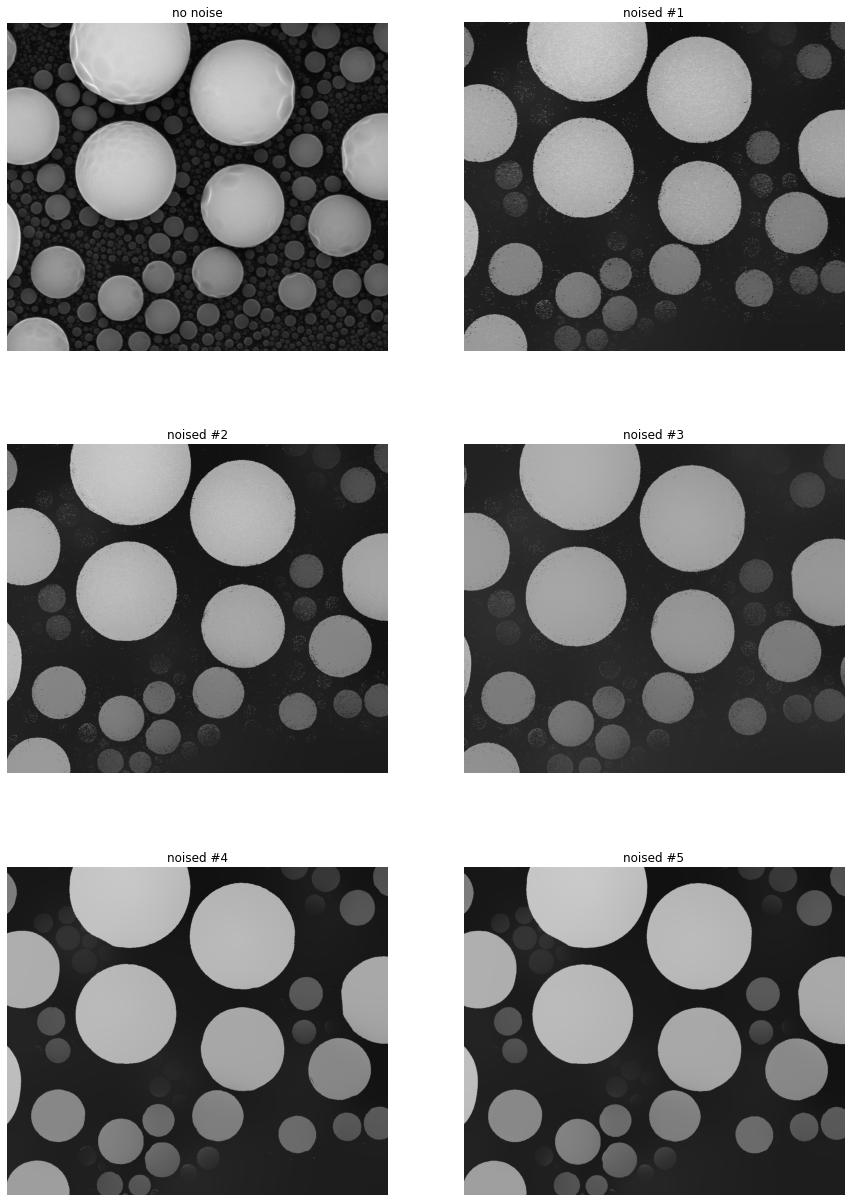

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# bilateral filter
case7_001 = cv2.bilateralFilter(case6_001, -1, 70, 70)
case7_002 = cv2.bilateralFilter(case6_002, -1, 70, 70)
case7_003 = cv2.bilateralFilter(case6_003, -1, 70, 70)
case7_004 = cv2.bilateralFilter(case6_004, -1, 70, 70)
case7_005 = cv2.bilateralFilter(case6_005, -1, 70, 70)

# list variables for image and subplot title
case7_src = [tinball_clean, case7_001, case7_002, case7_003, case7_004, case7_005]
case7_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(case7_src[i])
    plt.title(case7_title[i])
    plt.axis("off")

# save files
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_50ns_017.tif',  case7_001)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_100ns_017.tif', case7_002)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_500ns_017.tif', case7_003)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_1us_017.tif',   case7_004)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_3us_017.tif',   case7_005)

True

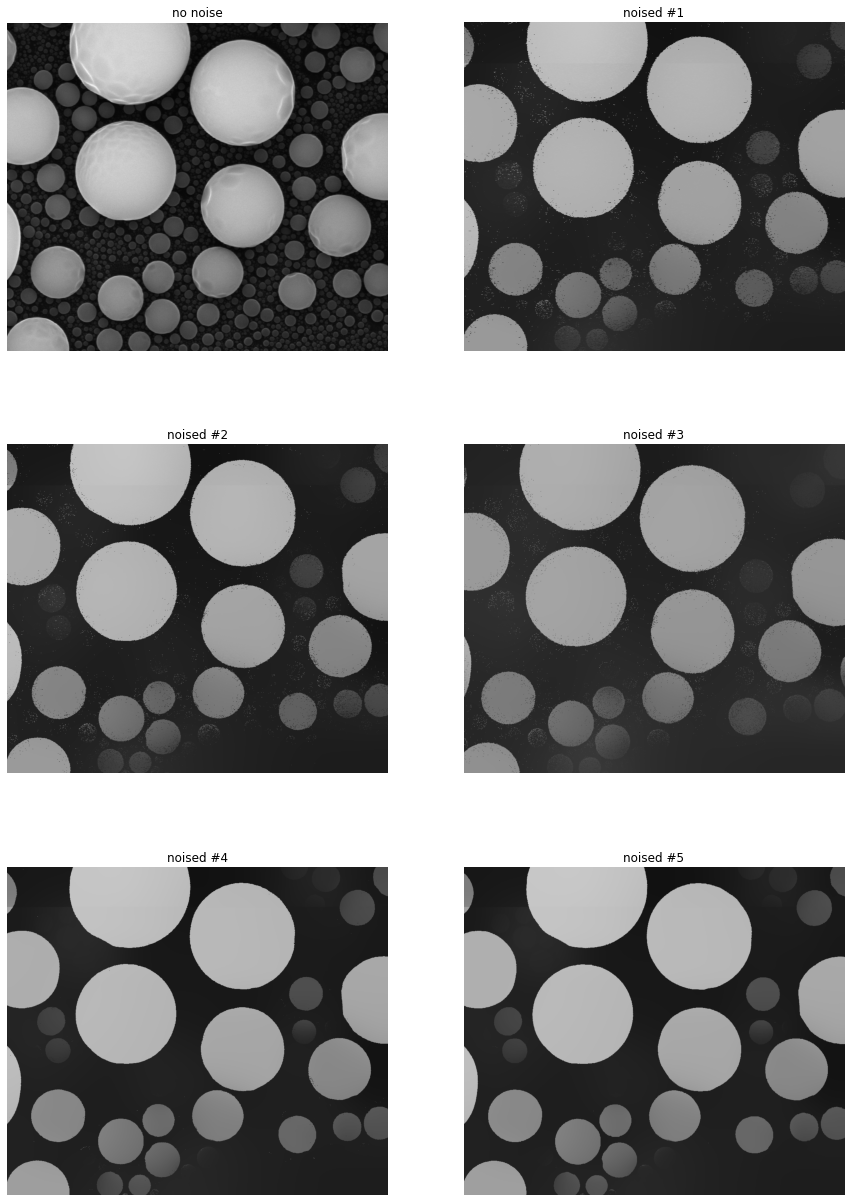

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# bilateral filter
case8_001 = cv2.bilateralFilter(case7_001, -1, 80, 80)
case8_002 = cv2.bilateralFilter(case7_002, -1, 80, 80)
case8_003 = cv2.bilateralFilter(case7_003, -1, 80, 80)
case8_004 = cv2.bilateralFilter(case7_004, -1, 80, 80)
case8_005 = cv2.bilateralFilter(case7_005, -1, 80, 80)

# list variables for image and subplot title
case8_src = [tinball_clean, case8_001, case8_002, case8_003, case8_004, case8_005]
case8_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(case8_src[i])
    plt.title(case8_title[i])
    plt.axis("off")

# save files
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_50ns_018.tif',  case8_001)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_100ns_018.tif', case8_002)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_500ns_018.tif', case8_003)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_1us_018.tif',   case8_004)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_3us_018.tif',   case8_005)

True

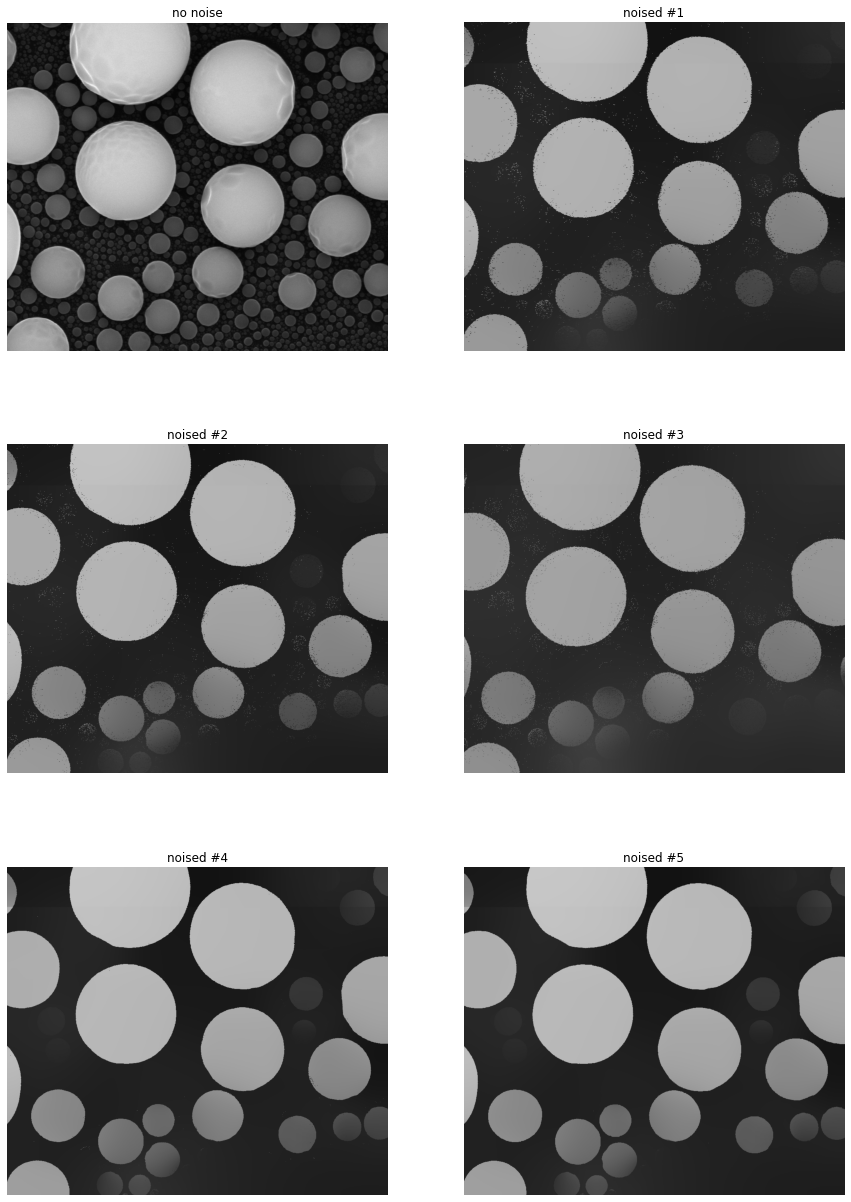

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# bilateral filter
case9_001 = cv2.bilateralFilter(case8_001, -1, 90, 90)
case9_002 = cv2.bilateralFilter(case8_002, -1, 90, 90)
case9_003 = cv2.bilateralFilter(case8_003, -1, 90, 90)
case9_004 = cv2.bilateralFilter(case8_004, -1, 90, 90)
case9_005 = cv2.bilateralFilter(case8_005, -1, 90, 90)

# list variables for image and subplot title
case9_src = [tinball_clean, case9_001, case9_002, case9_003, case9_004, case9_005]
case9_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(case9_src[i])
    plt.title(case9_title[i])
    plt.axis("off")

# save files
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_50ns_019.tif',  case9_001)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_100ns_019.tif', case9_002)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_500ns_019.tif', case9_003)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_1us_019.tif',   case9_004)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_3us_019.tif',   case9_005)

True

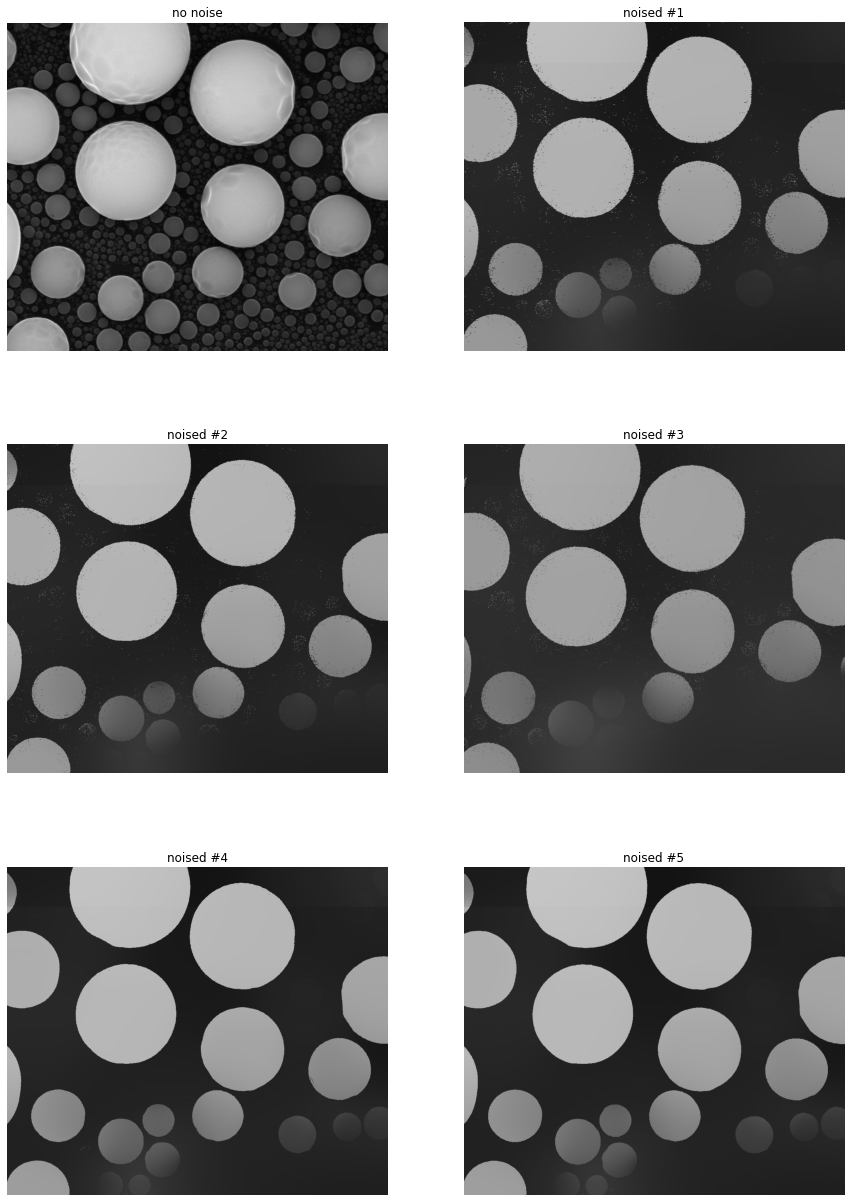

In [ ]:
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# bilateral filter
case10_001 = cv2.bilateralFilter(case9_001, -1, 100, 100)
case10_002 = cv2.bilateralFilter(case9_002, -1, 100, 100)
case10_003 = cv2.bilateralFilter(case9_003, -1, 100, 100)
case10_004 = cv2.bilateralFilter(case9_004, -1, 100, 100)
case10_005 = cv2.bilateralFilter(case9_005, -1, 100, 100)

# list variables for image and subplot title
case10_src = [tinball_clean, case10_001, case10_002, case10_003, case10_004, case10_005]
case10_title = ['no noise', 'noised #1', 'noised #2', 'noised #3', 'noised #4', 'noised #5']

for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(case10_src[i])
    plt.title(case10_title[i])
    plt.axis("off")

# save files
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_50ns_0101.tif',  case10_001)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_100ns_0101.tif', case10_002)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_500ns_0101.tif', case10_003)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_1us_0101.tif',   case10_004)
cv2.imwrite('/content/drive/MyDrive/ML/0824/Dwell_3us_0101.tif',   case10_005)